In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def dis(img, cmap="gray"):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

In [3]:
#getting the data from the jpg
kitkat = cv2.imread('kitkat.jpg',0)
chocolate = cv2.imread('chocolates.jpg',0)

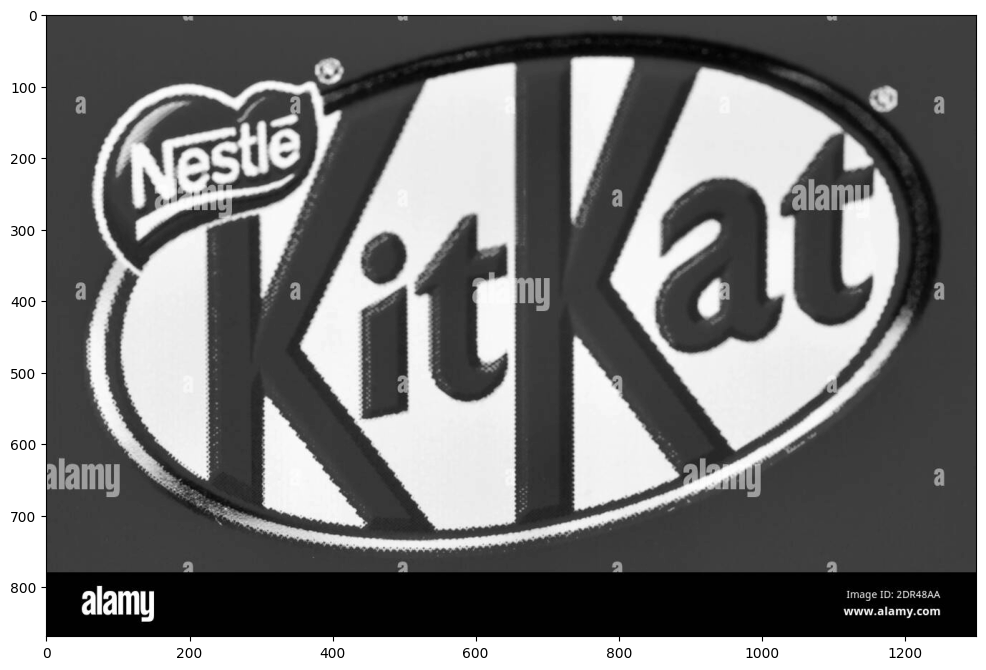

In [4]:
#displaying the kitkat image
dis(kitkat)

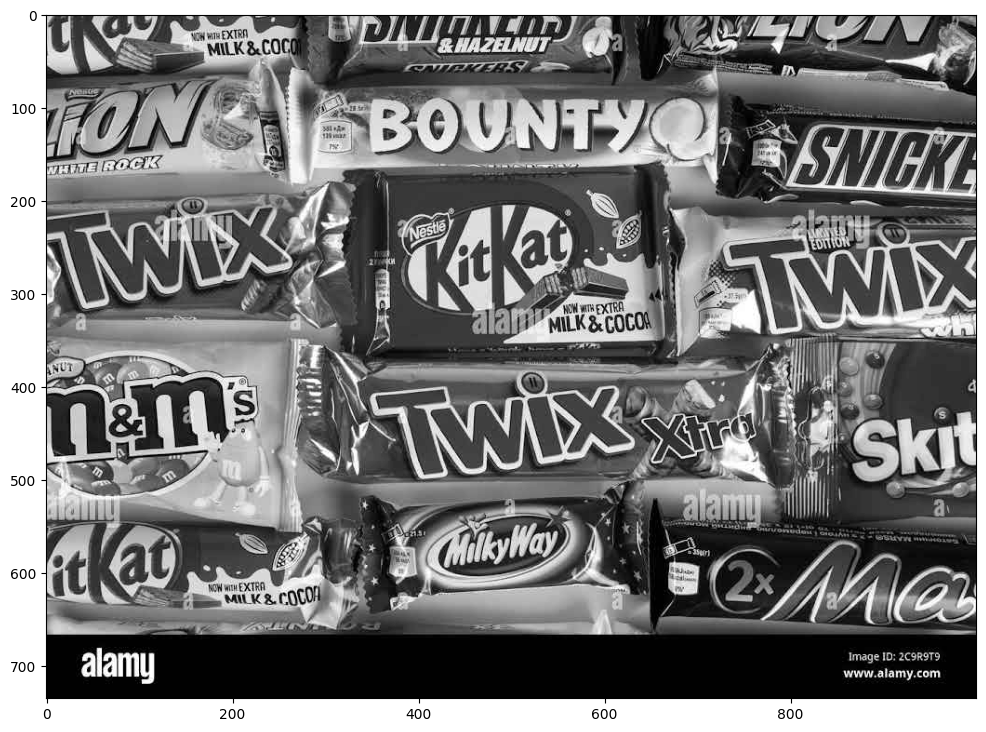

In [5]:
#displaying the chocolate image
dis(chocolate)

In [6]:
#a) Brute Force Detection with ORB Descriptors
orb = cv2.ORB_create()#ORB detector
#keypoints and descriptors
kp1, des1 = orb.detectAndCompute(kitkat,None)
kp2, des2 = orb.detectAndCompute(chocolate,None)
#BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key = lambda x:x.distance)
kitkatmatch = cv2.drawMatches(kitkat,kp1,chocolate,kp2,matches[:50],None,flags=2)#Matches the first 50 features

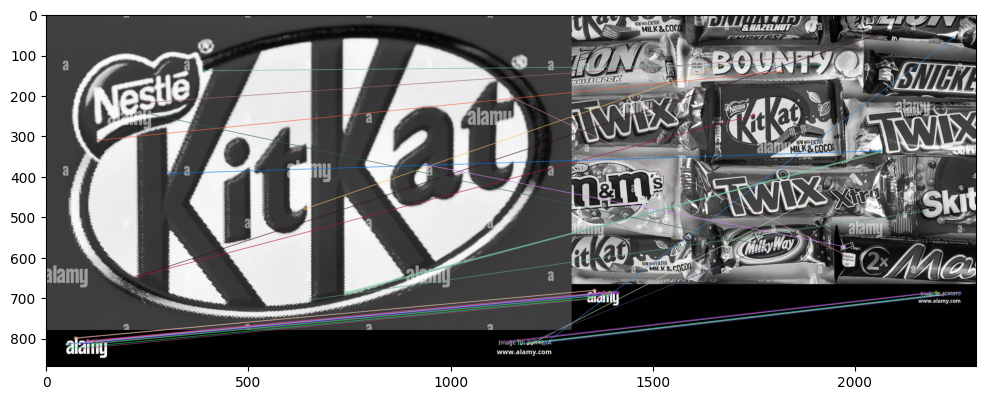

In [7]:
dis(kitkatmatch)
#most of the featuers that are being matched are the water marks on the bottom of the images

In [8]:
#b) Brute-Force Matching with SIFT Descriptors and Ratio Test
sift = cv2.xfeatures2d.SIFT_create()
#keypoints and descriptors
kp1, des1 = sift.detectAndCompute(kitkat,None)
kp2, des2 = sift.detectAndCompute(chocolate,None)
#BFMatcher
bf= cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
#ratio test
good = []
for match1, match2 in matches:
  if match1.distance< 0.75*match2.distance:
    good.append([match1])
siftmatc = cv2.drawMatchesKnn(kitkat,kp1,chocolate,kp2,matches[:50],None,flags=2)#Matches the first 50 features

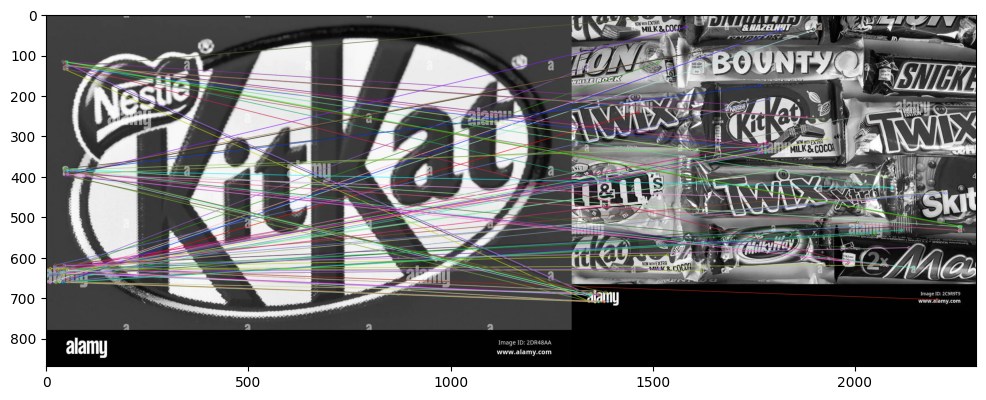

In [9]:
dis(siftmatc)

In [10]:
#c) FLANN based Matcher
FLANN_INDEX_KDTREE = 0
indexparams = dict(algorithm = FLANN_INDEX_KDTREE, tree=5)
searchparams = dict(checks=50)
#flann parameters
flann=cv2.FlannBasedMatcher(indexparams,searchparams)
matches=flann.knnMatch(des1,des2,k=2)
good=[]
#ratio test
for i,(match1, match2) in enumerate(matches):
  if match1.distance< 0.75*match2.distance:
    good.append([match1])
flannmatch=cv2.drawMatchesKnn(kitkat,kp1,chocolate,kp2,good,None,flags=0)

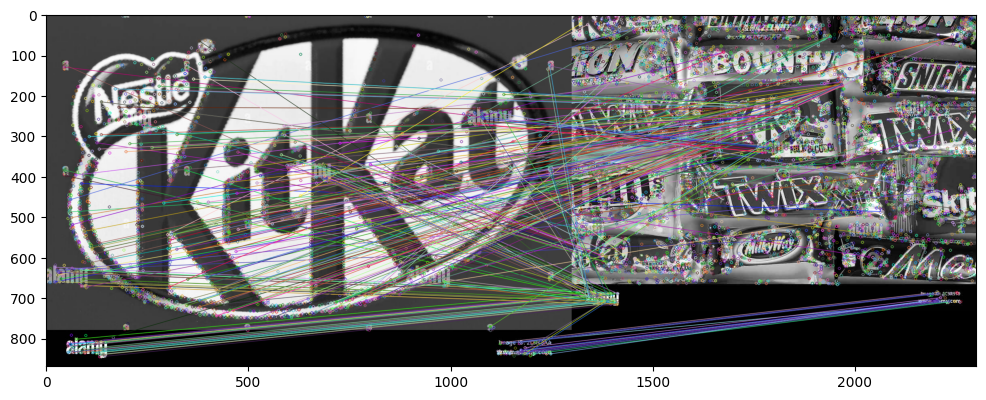

In [11]:
dis(flannmatch)